# Week 04 Data Exploration, Splitting, Pipeline Creation

The data that was read in Week 03 was transformed to be read.  First, we need to read in the data from the end of Week03.

```
import pandas as pd

airbnb = pd.read_csv('airbnb_eda.csv')
airbnb.head(10)
```

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
airbnb = pd.read_csv('airbnb_eda.csv')
airbnb.head(10)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,365.0
6,NaN,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2015.0,71.0,14.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0
7,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009.0,1060.0,212.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0
8,verified,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,2005.0,1018.0,204.0,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0
9,unconfirmed,Manhattan,Upper West Side,40.80178,-73.96723,False,strict,Private room,2015.0,291.0,58.0,2.0,118.0,7/21/2017,0.99,5.0,1.0,365.0


In [3]:
# Create a view of the data structure
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          101526 non-null  object 
 1   neighbourhood group             101783 non-null  object 
 2   neighbourhood                   101796 non-null  object 
 3   lat                             101803 non-null  float64
 4   long                            101803 non-null  float64
 5   instant_bookable                101711 non-null  object 
 6   cancellation_policy             101740 non-null  object 
 7   room type                       101811 non-null  object 
 8   Construction year               101601 non-null  float64
 9   price                           101811 non-null  float64
 10  service fee                     101572 non-null  float64
 11  minimum nights                  101411 non-null  float64
 12  number of review

# The Record count is 101,811
Now we need to determine the number of missing values

In [4]:
# of missing values in the dataset
airbnb.isnull().sum()

host_identity_verified              285
neighbourhood group                  28
neighbourhood                        15
lat                                   8
long                                  8
instant_bookable                    100
cancellation_policy                  71
room type                             0
Construction year                   210
price                                 0
service fee                         239
minimum nights                      400
number of reviews                   183
last review                       15806
reviews per month                 15791
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

# Target Variable
The target variable will be the total_price = price + service fee
There are 239 records we can delete inorder to make sure there are no records with missing service fee columns.

In [5]:
airbnb.dropna(subset=['service fee'], axis=0, inplace=True)

In [6]:
airbnb['total_price'] = airbnb['price']+airbnb['service fee']


# Drop the price and service fee columns
Since we used price and service to create a new variable total_price, the two columns price and service fee will be dropped.

In [7]:
airbnb.drop(['price', 'service fee'], axis=1, inplace = True)

# Drop columns
Drop the columns last review and reviews per month from the data set since there is at least 15% missing values.

In [8]:
airbnb.drop(['last review', 'reviews per month'], axis=1, inplace=True)

In [9]:
airbnb.describe().T   #T is transpose the describe output

,count,mean,std,min,25%,50%,75%,max
lat,101564.0,40.728092,0.055860,40.49979,40.68872,40.72228,40.76278,40.91697
long,101564.0,-73.949656,0.049508,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522
Construction year,101368.0,2012.487708,5.765688,2003.00000,2007.00000,2012.00000,2017.00000,2022.00000
minimum nights,101172.0,7.944293,18.230572,0.00000,2.00000,3.00000,5.00000,365.00000
number of reviews,101389.0,27.529673,49.607475,0.00000,1.00000,7.00000,31.00000,1024.00000
review rate number,101253.0,3.278767,1.284953,1.00000,2.00000,3.00000,4.00000,5.00000
calculated host listings count,101253.0,7.929622,32.277853,1.00000,1.00000,1.00000,2.00000,332.00000
availability 365,101124.0,140.196472,133.421147,0.00000,3.00000,96.00000,268.00000,365.00000
total_price,101572.0,750.300732,397.984749,60.00000,408.00000,749.00000,1096.00000,1440.00000


In [10]:
airbnb.describe(include='object').T

,count,unique,top,freq
host_identity_verified,101288,2,unconfirmed,50714
neighbourhood group,101544,5,Manhattan,43350
neighbourhood,101557,224,Bedford-Stuyvesant,7860
instant_bookable,101476,2,False,50949
cancellation_policy,101501,3,moderate,34000
room type,101572,4,Entire home/apt,53182


# Since the neighbourhood has 224 categorical values
Categorical columns that are labels that does have an order uses OneHot encoders so 224 new features will be added to the data set.  As a result, neighbourhood feature will be deleted.

In [11]:
airbnb.drop('neighbourhood', axis=1, inplace=True)

# Look at the distribution of the column room type
Since the room type is a important component of price per night.  We need to know the distribution of room types.  We can get the counts per room type by entering the following command.
```
airbnb["room type"].value_counts()
```

When we take the random sample to divide the data set into training and testing data set we will want to make sure each has the same percent distribution in each of the room type.  This is called Stratified Random Sampling because the data is split in a manner that allows each data set to have the same percentage of room type in each dataset.  The code that will used to split the data using stratified random sample in Sci-Kit Learn is listed below.

```

airbnb_train_set, airbnb_test_set = train_test_split(
    arbnb, test_size=0.2, stratify=airbnb["room type"], random_state=42)
```

In [12]:
# Since the room type is expected to directly affect revenue generated by the property 
# same distribution of room types in the training and test datasets.  First, determine the room type distribution
airbnb['room type'].value_counts()

room type
Entire home/apt    53182
Private room       46080
Shared room         2197
Hotel room           113
Name: count, dtype: int64

In [13]:
# percentage breakdown
airbnb['room type'].value_counts()*100/len(airbnb)

room type
Entire home/apt    52.358918
Private room       45.366833
Shared room         2.162998
Hotel room          0.111251
Name: count, dtype: float64

# Splitting the Data into two data sets

Before we train a machine learning model, we need to divide the data into two parts.  One part for training the data to get a model we think is good.  Another data to test if the predictions made are as good as those for the training data.  If they are about the same we can say the model generalizes to new data.  Remember the model will be applied new data sets without answers(target variable).  When the answers are found we compare the predictions to the answers to see if the machine learning process should be continue with remodeling.  As the population changes the machine learning model will also change to take into account characteristics about the new population.
<br><br>
The process of splitting the data will take into account the **distribution of the room type.**  When building the model, the team thinks room type will be a be an important when predicting the price for one night.
<br><br>
Here is the code we will use to split the data.  The strata or group that naturally occur in our data is room types.  So we will use a stratified random sample based on the room type.  To generate the same sample to work with the random_state must be the same.  If you use a different **random_state** value, your answers will be different from you classmates.  That is why when you go to Kaggle a Data Science competition, they separate the data into training and testing. Then each model created is tested on the same data set.  The best metrics results are awarded a prize.  Later when others want to test their knowledge on building machine learning models using the data they use the same test and training data sets. 

```
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(airbnb, test_size=0.2, stratify=airbnb["room type"], random_state=42)
```

In [14]:
# Second, split the data using a stratified random sample

train_set, test_set = train_test_split(airbnb, test_size=0.2, stratify=airbnb["room type"], random_state=42)

# To check the data was divided correctly
To check that the data was divided correctly, you should take the distribution of the train_set and test_set for the **room type**.  The code we would used to determine the percentages is listed below.

## Train Data set
```
train_set['room type'].value_counts()*100/len(train_set)
```

## Test Data set
```
test_set['room type'].value_counts()*100/len(test_set)
```


In [15]:
# Check distribution of the airbnb data set
airbnb['room type'].value_counts()*100/len(airbnb)

room type
Entire home/apt    52.358918
Private room       45.366833
Shared room         2.162998
Hotel room          0.111251
Name: count, dtype: float64

In [16]:
# Check distribution of the train_set
train_set['room type'].value_counts()*100/len(train_set)


room type
Entire home/apt    52.358566
Private room       45.367168
Shared room         2.163506
Hotel room          0.110760
Name: count, dtype: float64

In [17]:
# Check distribution of the test_set
test_set['room type'].value_counts()*100/len(test_set)

room type
Entire home/apt    52.360325
Private room       45.365493
Shared room         2.160965
Hotel room          0.113217
Name: count, dtype: float64

# Check Record number in each data set
We will check the number of records in each data set

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81257 entries, 84174 to 33792
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          81027 non-null  object 
 1   neighbourhood group             81235 non-null  object 
 2   lat                             81250 non-null  float64
 3   long                            81250 non-null  float64
 4   instant_bookable                81175 non-null  object 
 5   cancellation_policy             81195 non-null  object 
 6   room type                       81257 non-null  object 
 7   Construction year               81092 non-null  float64
 8   minimum nights                  80945 non-null  float64
 9   number of reviews               81111 non-null  float64
 10  review rate number              81000 non-null  float64
 11  calculated host listings count  80990 non-null  float64
 12  availability 365                8

In [19]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20315 entries, 82417 to 63297
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          20261 non-null  object 
 1   neighbourhood group             20309 non-null  object 
 2   lat                             20314 non-null  float64
 3   long                            20314 non-null  float64
 4   instant_bookable                20301 non-null  object 
 5   cancellation_policy             20306 non-null  object 
 6   room type                       20315 non-null  object 
 7   Construction year               20276 non-null  float64
 8   minimum nights                  20227 non-null  float64
 9   number of reviews               20278 non-null  float64
 10  review rate number              20253 non-null  float64
 11  calculated host listings count  20263 non-null  float64
 12  availability 365                2

# Give train_set a new name - airBnb

We will refer to the training _set as airBnb by copying the training_set into a dataframe call airBnb.  The capital B will make the dataframe different from the original data set airbnb.



In [20]:
# give training set a new name
airBnb = train_set.copy()

In [21]:
# Describe the numerical data
airBnb.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,81250.0,40.728155,0.055839,40.49979,40.68881,40.72228,40.76279,40.91697
long,81250.0,-73.949584,0.049505,-74.24984,-73.98253,-73.95439,-73.93232,-73.70524
Construction year,81092.0,2012.481478,5.764184,2003.00000,2007.00000,2012.00000,2017.00000,2022.00000
minimum nights,80945.0,7.908493,18.086638,0.00000,2.00000,3.00000,5.00000,365.00000
number of reviews,81111.0,27.517242,49.700990,0.00000,1.00000,7.00000,31.00000,1024.00000
review rate number,81000.0,3.278074,1.285994,1.00000,2.00000,3.00000,4.00000,5.00000
calculated host listings count,80990.0,7.926275,32.220170,1.00000,1.00000,1.00000,2.00000,332.00000
availability 365,80904.0,139.988802,133.313365,0.00000,3.00000,96.00000,268.00000,365.00000
total_price,81257.0,749.743308,397.842914,60.00000,408.00000,748.00000,1094.00000,1440.00000


In [22]:
# Describing the categorical (string) data
airBnb.describe(include=[object]).T

,count,unique,top,freq
host_identity_verified,81027,2,unconfirmed,40624
neighbourhood group,81235,5,Manhattan,34747
instant_bookable,81175,2,False,40737
cancellation_policy,81195,3,moderate,27183
room type,81257,4,Entire home/apt,42545


# Determine the number of missing values

In [23]:
# Number of missing values
airBnb.isnull().sum()

host_identity_verified            230
neighbourhood group                22
lat                                 7
long                                7
instant_bookable                   82
cancellation_policy                62
room type                           0
Construction year                 165
minimum nights                    312
number of reviews                 146
review rate number                257
calculated host listings count    267
availability 365                  353
total_price                         0
dtype: int64

# Data Exploration
<br>
First, we will look at categorical and then numeric features. 



## Categorical Features
Look at each of the categorical variables and create a pivot table of **categorical features vs room type** and **mean total price.** 

In [24]:
# Crosstab host_identify_verified vs room type

host_identify_verified_roomtype = pd.pivot_table(airBnb, values='total_price', 
                index ='host_identity_verified', columns=['room type'], aggfunc='mean')

host_identify_verified_roomtype

room type,Entire home/apt,Hotel room,Private room,Shared room
host_identity_verified,,,,
unconfirmed,748.262698,747.936170,752.081855,768.652620
verified,750.846059,774.953488,745.974563,762.982877


In [25]:
# Crosstab neighbourhood group vs room type

neighbourhood_grp_roomtype = pd.pivot_table(airBnb, values='total_price', 
                index ='neighbourhood group', columns=['room type'], aggfunc='mean') 

neighbourhood_grp_roomtype

room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,747.214286,NaN,760.548256,733.810000
Brooklyn,750.961397,899.000000,748.013843,765.512232
Manhattan,748.829560,774.189873,745.993742,760.696581
Queens,746.141200,531.285714,758.607160,786.857639
Staten Island,772.799479,NaN,711.011527,820.428571


In [26]:
# Crosstab instant bookable vs room type

instant_bookable_roomtype= pd.pivot_table(airBnb, values='total_price', 
                index ='instant_bookable', columns=['room type'], aggfunc='mean') 

instant_bookable_roomtype

room type,Entire home/apt,Hotel room,Private room,Shared room
instant_bookable,,,,
False,751.434440,758.973684,746.265997,758.964953
True,747.636553,762.211538,752.134557,771.981090


In [27]:
# Cancellation policy vs room type

cancellation_policy_roomtype= pd.pivot_table(airBnb, values='total_price', 
                index ='cancellation_policy', columns=['room type'], aggfunc='mean') 

cancellation_policy_roomtype

room type,Entire home/apt,Hotel room,Private room,Shared room
cancellation_policy,,,,
flexible,751.819545,831.176471,745.565711,791.467577
moderate,751.271249,640.533333,750.130002,761.504288
strict,745.507764,807.692308,751.726277,743.904437


## The cancellation_policy feature can be replace with numbers based 


In [28]:
# Change cancllation policy to a float

airBnb = airBnb.replace({'flexible':'1', 'moderate': '2', 'strict': '3'})

cancellation_policy_roomtype= pd.pivot_table(airBnb, values='total_price', 
                index ='cancellation_policy', columns=['room type'], aggfunc='mean') 

cancellation_policy_roomtype

room type,Entire home/apt,Hotel room,Private room,Shared room
cancellation_policy,,,,
1,751.819545,831.176471,745.565711,791.467577
2,751.271249,640.533333,750.130002,761.504288
3,745.507764,807.692308,751.726277,743.904437


In [29]:
# Change cancellation_policy_roomtype to a float number

airBnb['cancellation_policy']= airBnb['cancellation_policy'].astype(float)


In [30]:
# Determine the features that are categorical

category_columns = airBnb.select_dtypes(include=['object']).columns
category_columns

Index(['host_identity_verified', 'neighbourhood group', 'instant_bookable',
       'room type'],
      dtype='object')

## Numeric Data
<br>
Let's look at the numerical values starting with the describe().

In [31]:
airBnb.describe().T  # Transpose the list

,count,mean,std,min,25%,50%,75%,max
lat,81250.0,40.728155,0.055839,40.49979,40.68881,40.72228,40.76279,40.91697
long,81250.0,-73.949584,0.049505,-74.24984,-73.98253,-73.95439,-73.93232,-73.70524
cancellation_policy,81195.0,2.000961,0.815611,1.00000,1.00000,2.00000,3.00000,3.00000
Construction year,81092.0,2012.481478,5.764184,2003.00000,2007.00000,2012.00000,2017.00000,2022.00000
minimum nights,80945.0,7.908493,18.086638,0.00000,2.00000,3.00000,5.00000,365.00000
number of reviews,81111.0,27.517242,49.700990,0.00000,1.00000,7.00000,31.00000,1024.00000
review rate number,81000.0,3.278074,1.285994,1.00000,2.00000,3.00000,4.00000,5.00000
calculated host listings count,80990.0,7.926275,32.220170,1.00000,1.00000,1.00000,2.00000,332.00000
availability 365,80904.0,139.988802,133.313365,0.00000,3.00000,96.00000,268.00000,365.00000
total_price,81257.0,749.743308,397.842914,60.00000,408.00000,748.00000,1094.00000,1440.00000


The only features that are skewed is minimum nights, number of reviews, calculated host listings count, and availability 365.

In [32]:
numeric_columns = airBnb.select_dtypes(include=['number']).columns
numeric_columns

Index(['lat', 'long', 'cancellation_policy', 'Construction year',
       'minimum nights', 'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365', 'total_price'],
      dtype='object')

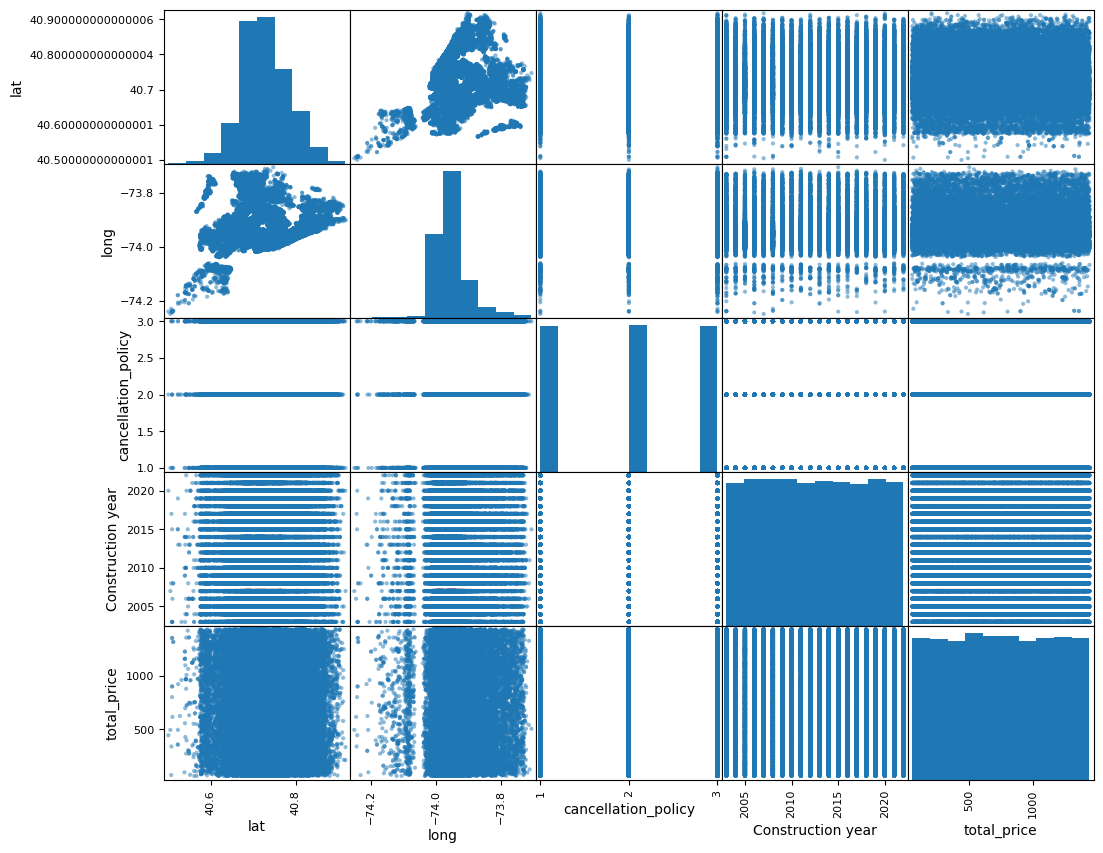

In [33]:


numeric_columns1 = ['lat', 'long', 'cancellation_policy', 'Construction year', 'total_price']

scatter_matrix(airBnb[numeric_columns1], figsize=(12,10))
plt.show()

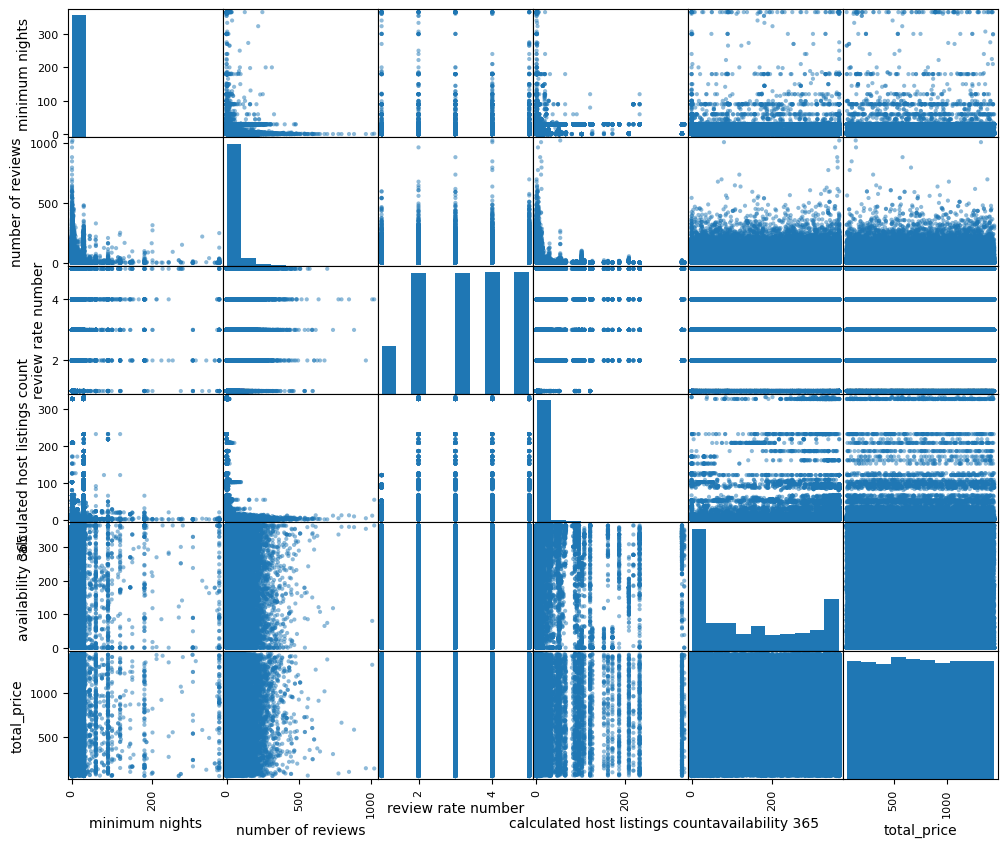

In [34]:

numeric_columns2 = ['minimum nights', 'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365', 'total_price']

scatter_matrix(airBnb[numeric_columns2], figsize=(12,10))
plt.show()

In [35]:
# Now it time to create Correlations
corr_matrix = airBnb[numeric_columns].corr()
corr_matrix['total_price'].sort_values(ascending = False)

total_price                       1.000000
long                              0.003650
number of reviews                 0.003352
calculated host listings count    0.000272
availability 365                 -0.000616
cancellation_policy              -0.001639
review rate number               -0.002792
lat                              -0.003011
Construction year                -0.003891
minimum nights                   -0.004142
Name: total_price, dtype: float64

The correlation coefficients does not support a multiple linear model.  Regression models includes more than multiple
linear regressions.  There are other models Polynomial Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Random Forest Regression, SVM, and XBoost machine learning models.
<br>


# Data Visualizations


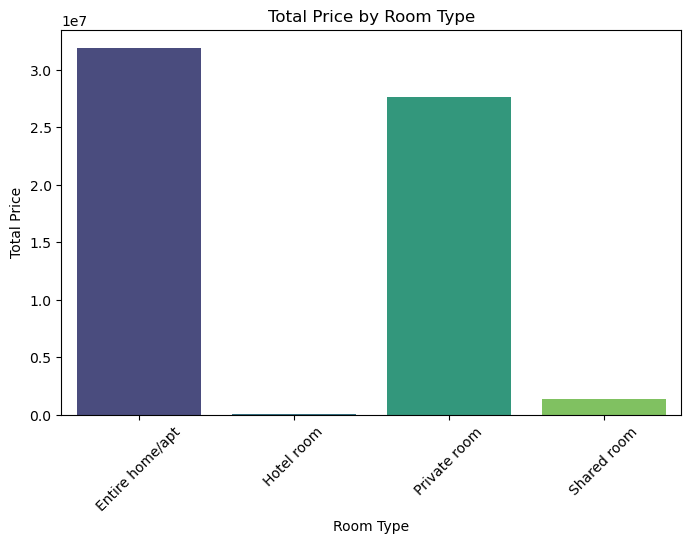

In [36]:
airBnb_grouped = airBnb.groupby("room type", as_index=False)["total_price"].sum()

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="room type", y="total_price", data=airBnb_grouped, palette="viridis")

# Customize the plot
plt.xlabel("Room Type")
plt.ylabel("Total Price")
plt.title("Total Price by Room Type")
plt.xticks(rotation=45)  # Rotate labels if needed

# Show the plot
plt.show()

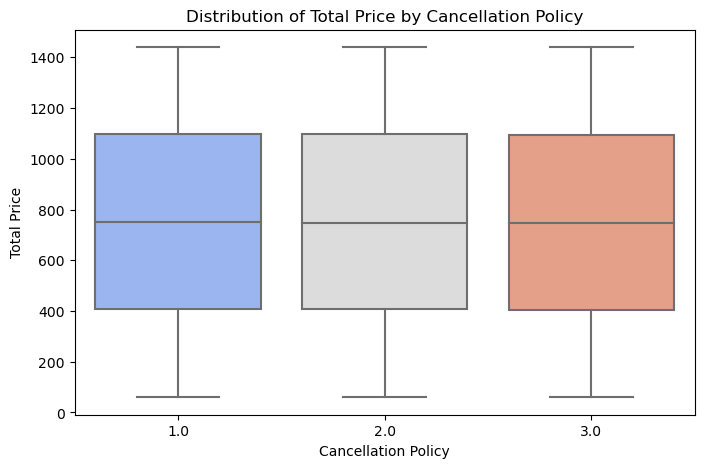

In [37]:
# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="cancellation_policy", y="total_price", data=airBnb, palette="coolwarm")

# Customize the plot
plt.xlabel("Cancellation Policy")
plt.ylabel("Total Price")
plt.title("Distribution of Total Price by Cancellation Policy")

# Show the plot
plt.show()

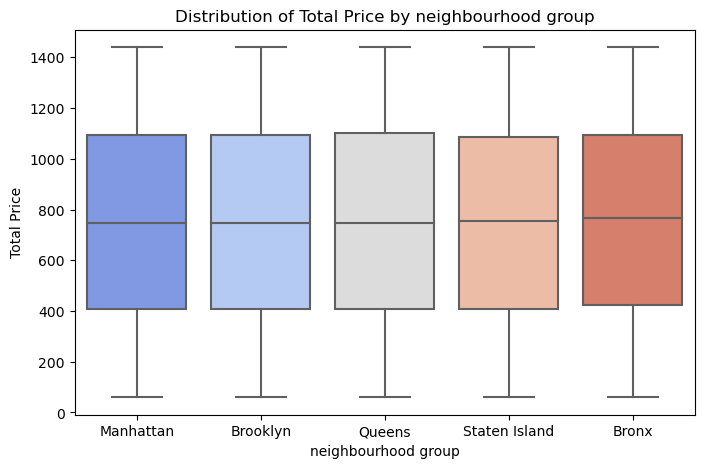

In [38]:
# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="neighbourhood group", y="total_price", data=airBnb, palette="coolwarm")

# Customize the plot
plt.xlabel("neighbourhood group")
plt.ylabel("Total Price")
plt.title("Distribution of Total Price by neighbourhood group")

# Show the plot
plt.show()

# Define Features and Target variables for both training and test data sets

We have not yet separated the features and the target variables.  The code below will separate the features and training set.

In [39]:
y_train = airBnb['total_price']
X_train = airBnb.drop("total_price", axis=1)

y_test = test_set["total_price"]
X_test = test_set.drop("total_price", axis=1)


In [40]:
type(X_train)

pandas.core.frame.DataFrame

# Dealing with Missing Numerical values
Replace the missing values with the median since the mean in many cases is close to being equal to the mean.
```
numeric_columns = X_train.select_dtypes(include=[np.number])

imputer = SimpleImputer(strategy="median")
imputer.fit(numeric_columns)
X = imputer.transform(numeric_columns)

X_tr_num = pd.DataFrame(X, columns=numeric_columns.columns, index=numeric_columns.index)
```
This would be the code we would use to replace the missing numerical value with the mean value for that column.

# Standarize the numerical data
To prevent any feature from dominating the model, we standarize the data where the mean is 0 and standard deviation
is 1.  (value - mean)/std std = standarize.  The code you would use to do this standardize the values is listed below.

```
numeric_columns = X_tr_num.select_dtypes(include=[np.number])

std_scaler = StandardScaler()
X_num_std = std_scaler.fit_transform(numeric_columns)
X_tr_num_std = pd.DataFrame(X_num_std, columns=numeric_columns.columns, index = numeric_columns.index)
```


# Create the numerical pipeline
A pipeline is a series of steps that the data set goes through to prepare the data to create a model.  During this week, we will only create the pipelines for the data.

In [41]:
# Creating a Pipeline for Numerical data
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])

# Dealing with Missing Categorical Values
Replace the missing values with mode of the column.

category_columns = airBnb.select_dtypes(include=['object'])

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(category_columns)
X_cat_mode = imputer.transform(category_columns)

X_tr_cat = pd.DataFrame(X_cat_mode, columns=category_columns.columns, index=numeric_columns.index)

# Change categorical columns to numbers using OneHotEncoder
The machine learning algorithms require all data input in the algorithms be numerical.  Categorical data creates a column for each unique value of the column a new column with 0 and 1.  For example Brooklyn would be a column with 0 if the record neighbourhood group is not Brooklyn and 1 if it is.

```

# Initialize OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" avoids dummy variable trap


# Fit and transform categorical columns
onehotencoder_data = onehotencoder.fit_transform(X_tr_cat)

# Convert to DataFrame with meaningful column names
encoded_X_tr = pd.DataFrame(onehotencoder_data, columns=onehotencoder.get_feature_names_out(X_cat.columns),
                            index=X_cat.index)
```

# Create the Categorical Pipeline
We will create the Pipeline for the categorical data.

In [42]:
from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(
     SimpleImputer(strategy="most_frequent"),
     OneHotEncoder(handle_unknown="ignore"))

# Create the data preprocessing pipeline

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object)))

In [44]:
# Appliying the preprocessing

In [45]:
airBnb_prepared = preprocessing.fit_transform(X_train)
airBnb_prepared

array([[ 1.42855539e+00, -3.57469936e-01,  1.22537348e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.90643676e-02, -7.42531641e-02,  1.22537348e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.31447228e+00, -3.58277972e-01, -1.17738740e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-1.29386497e-01, -7.14016015e-01, -1.22772825e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.22629318e-01, -1.84348129e-01, -1.17738740e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-7.44754738e-01,  7.28127020e-01, -1.22772825e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [46]:
# Save your train and test datasets
train_set.to_csv("train_set.csv")
test_set.to_csv("test_set.csv")

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_train, y_pred, squared=False)
lin_rmse

397.81484325021864